<a href="https://colab.research.google.com/github/AbeerProg/RRDS/blob/main/MLmodel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1:
file_path = 'datasetwithfeatures.xlsx'
df = pd.read_excel(file_path)




In [29]:
# Step 2:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
df.fillna(0, inplace=True)  # Fill missing values with 0



text                          0
1- punctuation_ratio          0
2-FSpronoun_ratio             0
3- word_count                57
4- repeated_word_ratio        0
5-vader_sentiment             0
6- generality_score           0
7-PassiveProportion           0
8- likesCount                57
9-reviewerNumberOfReviews    62
01- isLocalGuide             57
TotalMedia                   57
LABEL                         0
dtype: int64


In [30]:
# Check for missing values
print(df.isnull().sum())

text                         0
1- punctuation_ratio         0
2-FSpronoun_ratio            0
3- word_count                0
4- repeated_word_ratio       0
5-vader_sentiment            0
6- generality_score          0
7-PassiveProportion          0
8- likesCount                0
9-reviewerNumberOfReviews    0
01- isLocalGuide             0
TotalMedia                   0
LABEL                        0
dtype: int64


In [34]:
# Optional: Standardize features if needed (e.g., for models sensitive to feature scaling)
scaler = StandardScaler()
features = [ '1- punctuation_ratio', '2-FSpronoun_ratio', '3- word_count',
       '4- repeated_word_ratio', '5-vader_sentiment', '6- generality_score',
       '7-PassiveProportion', '8- likesCount', '9-reviewerNumberOfReviews',
       '01- isLocalGuide', 'TotalMedia']
X = df[features]
X_scaled = scaler.fit_transform(X)


In [32]:
df.columns = df.columns.str.strip()


In [33]:
print(df.columns)


Index(['text', '1- punctuation_ratio', '2-FSpronoun_ratio', '3- word_count',
       '4- repeated_word_ratio', '5-vader_sentiment', '6- generality_score',
       '7-PassiveProportion', '8- likesCount', '9-reviewerNumberOfReviews',
       '01- isLocalGuide', 'TotalMedia', 'LABEL'],
      dtype='object')


In [35]:

# Step 3:
y = df['LABEL']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [36]:
# Step 4:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [37]:
# Step 5: Model Evaluation
y_pred = clf.predict(X_test)

# Print the classification report and accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8881564491320589
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2466
           1       0.89      0.87      0.88      2085

    accuracy                           0.89      4551
   macro avg       0.89      0.89      0.89      4551
weighted avg       0.89      0.89      0.89      4551



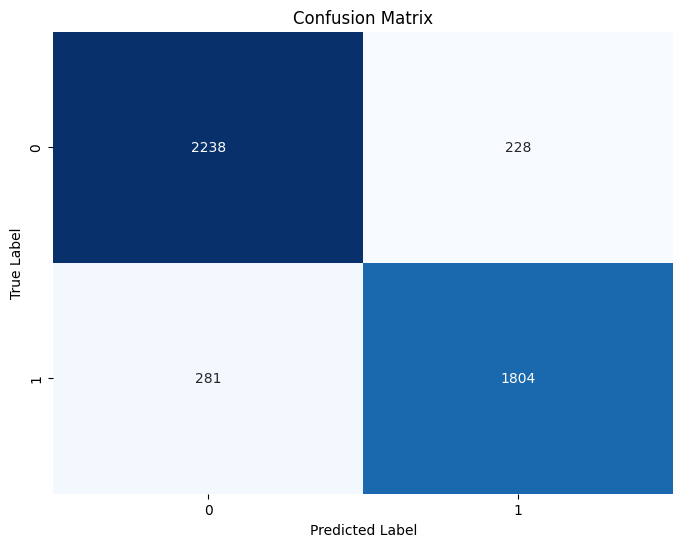

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


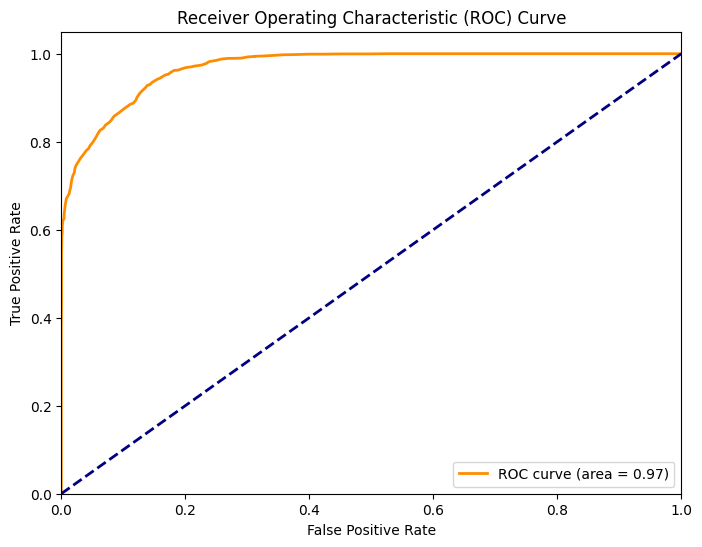

In [39]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


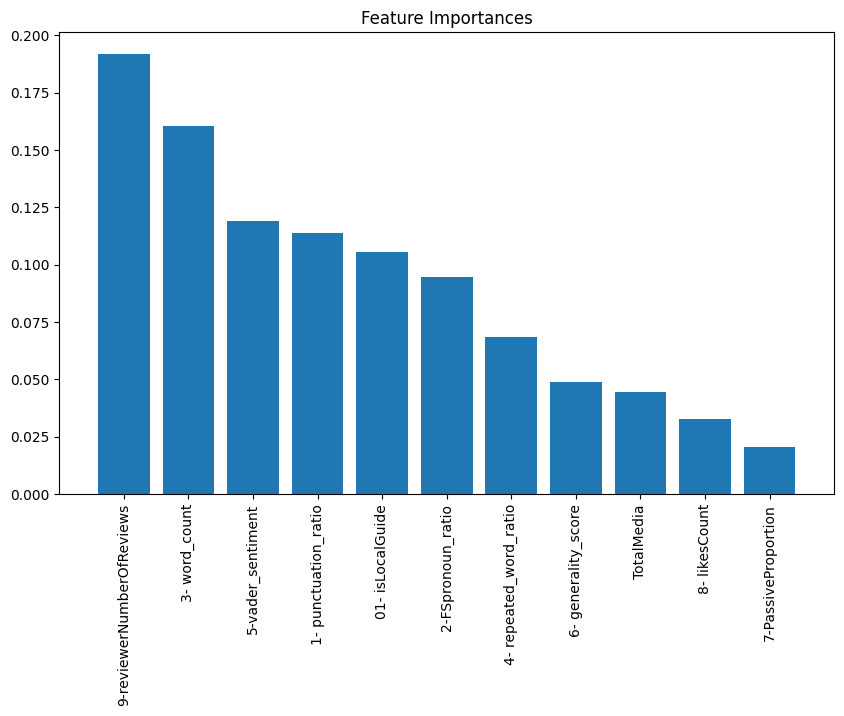

In [40]:
import numpy as np

# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
